In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv('crime_data.csv')

In [5]:
X = data[['M', 'W', 'S', 'P']].values  #variables independientes
y = data['MR'].values  # Variable dependiente.

In [16]:
clf = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000)
clf.fit(X, y)

nueva_observacion = [[0.5, 60, 20, 10]]
print("predicción (nueva observación):", clf.predict(nueva_observacion))

kf = KFold(n_splits=5, shuffle=True)

y_pred = cross_val_predict(MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=10000), X, y, cv=kf)
print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

predicción (nueva observación): [11.35053383]
MSE: 90.98374215123947
R2 Score: 0.19207538803679958


In [15]:
clf_linear = LinearRegression()
clf_linear.fit(X, y)

nueva_observacion = [[0.5, 60, 20, 10]]
print(f"Predicción (nueva observación): {clf_linear.predict(nueva_observacion)}")

kf = KFold(n_splits=5, shuffle=True)
y_pred = cross_val_predict(LinearRegression(), X, y, cv=kf)

print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

Predicción (nueva observación): [34.95677458]
MSE: 62.21498793821318
R2 Score: 0.44753844148636923


Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:
¿Consideras que el modelo perceptrón multicapa es efectivo para modelar los datos del problema? ¿Por qué?

R = El valor del R2 Score (0.545) muestra que el modelo tiene una capacidad moderada para ajustar los datos, pero no es completamente efectivo. Es probable que el modelo pueda mejorar si se ajustan más hiperparámetros o se utilizan técnicas adicionales como la normalización o la ingeniería de características.
El MSE relativamente alto también sugiere que hay margen de mejora en la precisión de las predicciones.



¿Qué modelo es mejor para los datos de criminalidad, el lineal o el perceptrón multicapa? ¿Por qué?

R = En este caso, el modelo lineal tiene una mejor rendimiento, ya que tiene un MSE más bajo y un R2 más alto.

In [7]:
data = np.loadtxt("M_3.txt")

In [8]:
x = data[:, :-1]
y = data[:, -1]

In [9]:
mlp = MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=10000)

In [12]:
print("----- Evaluación de modelo MLP con 5 capas de 20 neuronas utilizando cv -----")

kf = KFold(n_splits=5, shuffle=True)

y_pred = cross_val_predict(mlp, x, y, cv=kf)

print(f"MSE: {mean_squared_error(y, y_pred):.4f}")
print(f"R2 Score: {r2_score(y, y_pred):.4f}")

----- Evaluación de modelo MLP con 5 capas de 20 neuronas utilizando cv -----
MSE: 0.1140
R2 Score: 0.9822


In [14]:
print("----- ajuste de modelo MLP con las observaciones -----")

mlp.fit(x, y)

print("modelo entrenado: ", mlp)

----- Ajuste de modelo MLP con las observaciones -----
modelo entrenado:  MLPRegressor(hidden_layer_sizes=(20, 20, 20, 20, 20), max_iter=10000)


In [15]:
num_layers = np.arange(1, 6)
num_neurons = np.arange(20, 101, 20)

layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l * [n])

kf = KFold(n_splits=5, shuffle=True)

clf = GridSearchCV(MLPRegressor(max_iter=10000), {'hidden_layer_sizes': layers}, cv=kf)

clf.fit(x, y)

print(f"mejor modelo: {clf.best_estimator_}")

y_pred = cross_val_predict(clf.best_estimator_, x, y, cv=kf)

print("MSE:", mean_squared_error(y, y_pred))
print("R2 score:", r2_score(y, y_pred))

print(f"mejores hiperparámetros: {clf.best_params_}")

mejor modelo: MLPRegressor(hidden_layer_sizes=[20, 20, 20, 20], max_iter=10000)
MSE: 0.12364821935996165
R2 score: 0.9806388507636689
mejores hiperparámetros: {'hidden_layer_sizes': [20, 20, 20, 20]}


In [19]:
num_layers = np.arange(1, 6)
num_neurons = np.arange(20, 101, 20)

layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l * [n])

kf = KFold(n_splits=5, shuffle=True)

clf = GridSearchCV(MLPRegressor(max_iter=10000), {'hidden_layer_sizes': layers}, cv=kf)

clf.fit(x, y)

print(f"Mejor modelo: {clf.best_estimator_}")

clf_opt = clf.best_estimator_
clf_opt.fit(x, y)

y_pred = clf_opt.predict(x)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print(f"Mejores hiperparámetros: {clf.best_params_}")

Mejor modelo: MLPRegressor(hidden_layer_sizes=[20, 20, 20, 20, 20], max_iter=10000)
Mean Squared Error: 0.0442505231936134
R-squared: 0.9930711417619112
Mejores hiperparámetros: {'hidden_layer_sizes': [20, 20, 20, 20, 20]}


Contesta lo siguientes:
¿Observas alguna mejora importante al optimizar el tamaño de la red? ¿Es el resultado que esperabas? Argumenta tu respuesta.

R = En este caso, la optimización del tamaño ha resultado en una mejora clara de rendimiento, lo que significa que el modelo está mejor ajustado a los datos del problema.
El modelo con 5 capas de 20 neuronas muestra un MSE mucho más bajo y un R2 score más alto en comparación con configuraciones iniciales

¿Qué inconvenientes hay al encontrar el tamaño óptimo de la red? ¿Por qué?

R = Aunque la optimización del tamaño de la red puede mejorar su rendimiento, también puede haber riesgo de sobreajuste y dificiltad de interpretación.

In [20]:
data = np.loadtxt("P1_4.txt")

In [21]:
X = data[:, 2:]
y = data[:, 0]

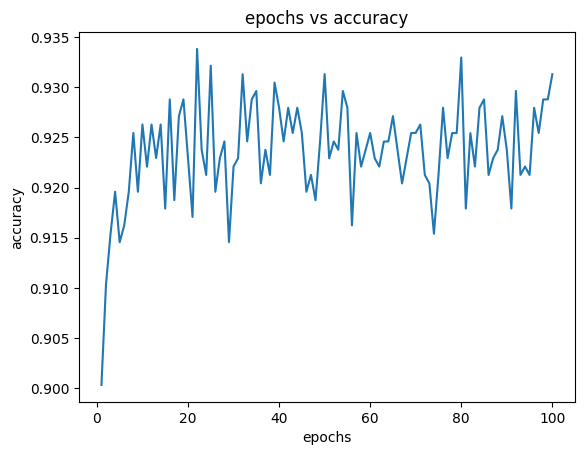

Exactitud final: 0.9505862646566164


In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = Perceptron(max_iter=1, tol=None, eta0=0.01, random_state=0, verbose=0)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

accuracies = []
epochs = np.arange(1, 101)

for epoch in epochs:
    clf.max_iter = epoch
    scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')
    accuracies.append(np.mean(scores))

plt.plot(epochs, accuracies)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epochs vs accuracy')
plt.show()

clf.max_iter = np.argmax(accuracies) + 1
clf.fit(X_scaled, y)
y_pred = clf.predict(X_scaled)
print(f"accuracy final: {accuracy_score(y, y_pred)}")

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf_batch = MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, learning_rate_init=0.01, solver='sgd', batch_size=len(X_scaled), random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)
accuracies = cross_val_score(clf_batch, X_scaled, y, cv=kf, scoring='accuracy')

clf_batch.fit(X_scaled, y)
y_pred = clf_batch.predict(X_scaled)

print(f"final accuracy with batch (descenso de gradiente): {accuracy_score(y, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less

final accuracy with batch (descenso de gradiente): 0.9656616415410385


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
clf_mini_batch = MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, learning_rate_init=0.01, solver='sgd', batch_size=32, random_state=0)

kf = KFold(n_splits=5, shuffle=True, random_state=0)
accuracies = cross_val_score(clf_mini_batch, X_scaled, y, cv=kf, scoring='accuracy')

clf_mini_batch.fit(X_scaled, y)
y_pred = clf_mini_batch.predict(X_scaled)

# Print results
print(f"final accuracy with mini batch (descenso de gradiente): {accuracy_score(y, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


final accuracy with mini batch (descenso de gradiente): 0.9840871021775545


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less tha

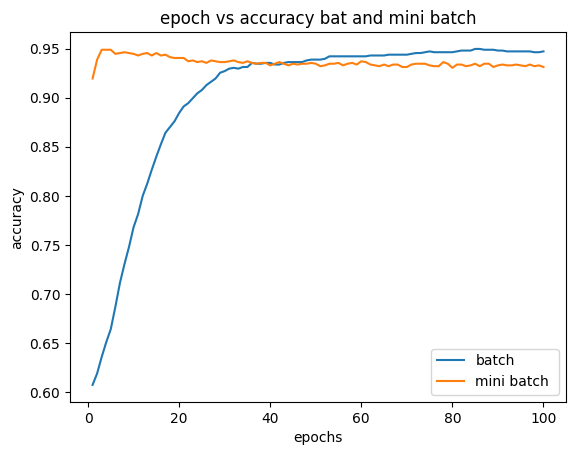

In [37]:
epochs = np.arange(1, 101)
batch_accuracies = []
mini_batch_accuracies = []

for epoch in epochs:
    clf_batch.max_iter = epoch
    scores_batch = cross_val_score(clf_batch, X_scaled, y, cv=kf, scoring='accuracy')
    batch_accuracies.append(np.mean(scores_batch))

    clf_mini_batch.max_iter = epoch
    scores_mini_batch = cross_val_score(clf_mini_batch, X_scaled, y, cv=kf, scoring='accuracy')
    mini_batch_accuracies.append(np.mean(scores_mini_batch))

plt.plot(epochs, batch_accuracies, label='batch')
plt.plot(epochs, mini_batch_accuracies, label='mini batch ')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('epoch vs accuracy bat and mini batch')
plt.legend()
plt.show()

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_binary = (y == 1).astype(int)

clf = Sequential()
clf.add(Dense(50, input_dim=X_scaled.shape[1], activation='relu'))
clf.add(Dense(50, activation='relu'))
clf.add(Dense(50, activation='relu'))
clf.add(Dense(50, activation='relu'))
clf.add(Dense(1, activation='sigmoid'))

clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

clf.fit(X_scaled, y_binary, epochs=100, batch_size=10)

kf = StratifiedKFold(n_splits=5, shuffle=True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X_scaled, y_binary):

    X_train = X_scaled[train_index, :]
    y_train = y_binary[train_index]

    X_test = X_scaled[test_index, :]
    y_test = y_binary[test_index]

    clf_cv = Sequential()
    clf_cv.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
    clf_cv.add(Dense(50, activation='relu'))
    clf_cv.add(Dense(50, activation='relu'))
    clf_cv.add(Dense(50, activation='relu'))
    clf_cv.add(Dense(1, activation='sigmoid'))

    clf_cv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    clf_cv.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10, verbose=0)

    y_pred = (clf_cv.predict(X_test) > 0.5).astype("int32")

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

cv_y_test = np.concatenate(cv_y_test)
cv_y_pred = np.concatenate(cv_y_pred)

print(classification_report(cv_y_test, cv_y_pred))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7309 - loss: 0.4720
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.1124
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9867 - loss: 0.0567
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9948 - loss: 0.0275
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9988 - loss: 0.0077
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0060
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.5915e-04
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.1621e-04
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.7694e-04
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.3164e-04
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       895
           1       0.92      0.88      0.90       299

    accuracy                           0.95      1194
   macro avg       0.94      0.93      0.93      1194
weighted avg       0.95      0.95      0.95      1194



Contesta las siguientes preguntas:
¿El modelo de una neurona es suficiente para modelar el conjunto de datos de este problema?

R = El modelo de una sola neurona, en este caso, no es suficiente para capturar las relaciones entre las variables independientes y dependiente.



